In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

First we plot the function we wish to study, 
$$f(x) = 10 \cdot (\sin(\frac{\pi}{6} x) + 0.001 \cdot \sin(\frac{2 \pi}{1000}x) - 0.001 x \sin(2\pi \cdot x) + 0.001x) $$

In [2]:
def f(x):
  
  val = 10 * (np.sin(np.pi/6 * x))

  return val

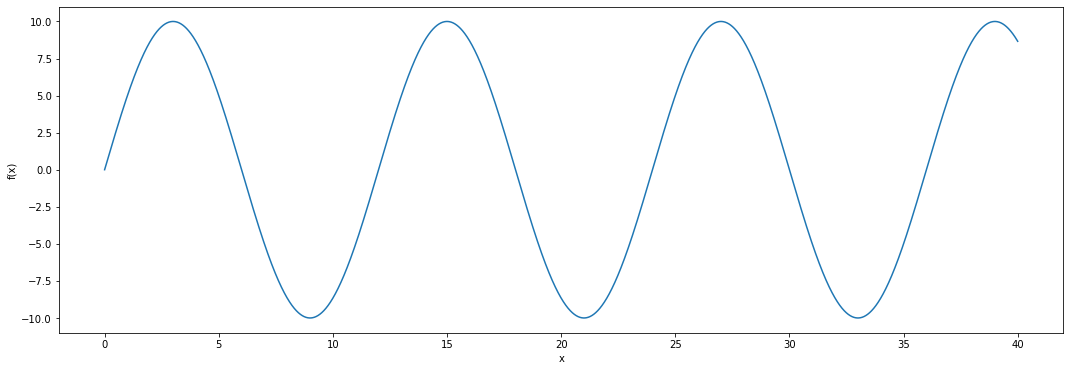

In [3]:
# plot the function on interval [0, 2*L]

L = 20

N_grid = 2**16 # number of points in the grid

grid = np.linspace(0, 2*L, N_grid+1)
grid = grid[0:N_grid]

f_vals = f(grid)

# plotting f

plt.figure(figsize=(18, 6))
plt.plot(grid, f_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


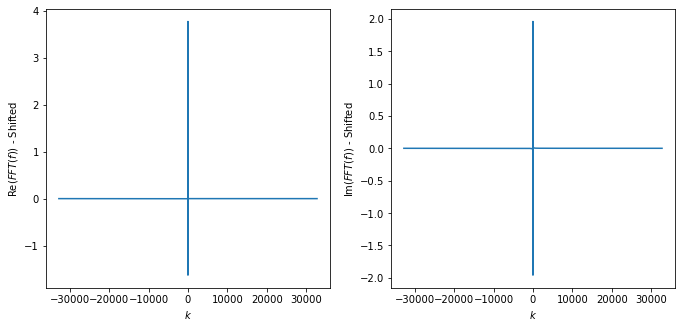

In [4]:
# the fftshift function fixes the issue with the peak amplitudes appearing at the wrong frequencies.
f_fft = np.fft.fft(f_vals)

f_fft_shifted = np.fft.fftshift(f_fft)
freq_grid =np.linspace(- N_grid/2, N_grid/2, N_grid)

f_hat = (1/N_grid)*f_fft_shifted

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10, 5))

fig.tight_layout(pad=3.0)

ax0.plot(freq_grid, f_hat.real)
ax0.set_xlabel(r'$k$')
ax0.set_ylabel(r'Re($FFT(f)$) - Shifted')

ax1.plot(freq_grid, f_hat.imag)
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'Im($FFT(f)$) - Shifted')

plt.show()

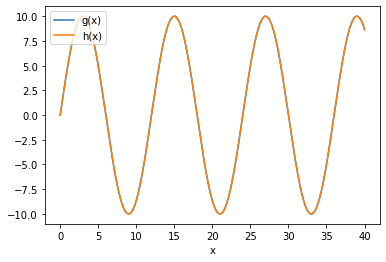

In [51]:
h_vals = np.fft.ifft( np.fft.ifftshift(f_hat * N_grid) )

h_vals = np.real(h_vals) # to get rid of negligble complex entries.

plt.plot(grid, f_vals, label="g(x)")
plt.plot(grid, h_vals, label="h(x)")
plt.xlabel('x')
plt.legend(loc="upper left")
plt.show()

We now take the FFT of the noisy signal and define a Gaussian filter.

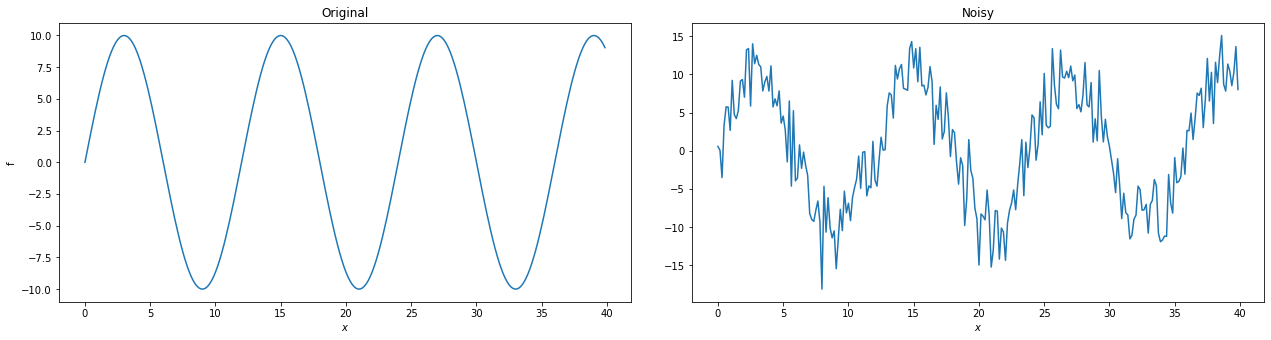

In [33]:
# Create noisy version of f

f_noisy_vals =  f_vals + 3 * np.random.randn(N_grid)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18, 5))

fig.tight_layout(pad=3.0)

ax0.plot(grid, f_vals)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'f')
ax0.set_title('Original')

ax1.plot(grid, f_noisy_vals)
ax1.set_xlabel(r'$x$')
ax1.set_title('Noisy')

plt.show()

We now take the FFT of the noisy signal and define a Gaussian filter.

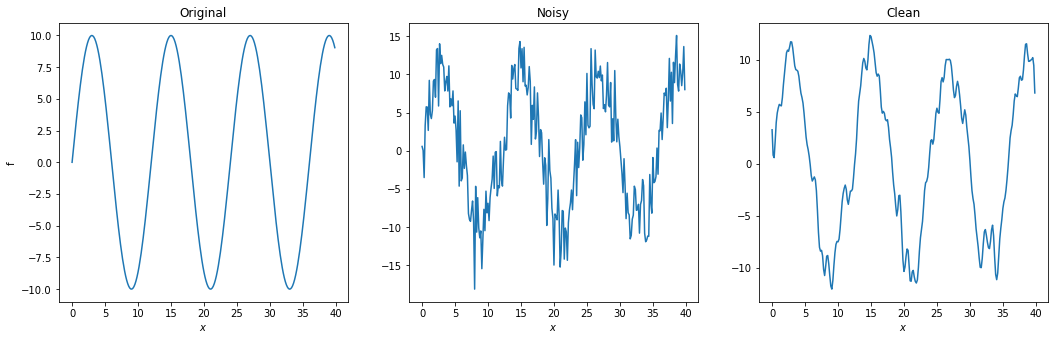

In [34]:
f_noisy_hat = np.fft.fftshift( np.fft.fft( f_noisy_vals))

Gaussian_filter_vals = np.exp( - (0.0005*freq_grid**2) )

f_clean_vals = np.fft.ifft( np.fft.ifftshift( f_noisy_hat*Gaussian_filter_vals ) )

f_clean_vals = np.real(f_clean_vals)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 5))

fig.tight_layout(pad=3.0)

ax0.plot(grid, f_vals)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'f')
ax0.set_title('Original')

ax1.plot(grid, f_noisy_vals)
ax1.set_xlabel(r'$x$')
ax1.set_title('Noisy')

ax2.plot(grid, f_clean_vals)
ax2.set_xlabel(r'$x$')
ax2.set_title('Clean')

plt.show()

In [5]:
dt = 1/12
data = f_vals
N = len(f_vals)
t0 = 0
time = np.arange(0, N) * dt + t0

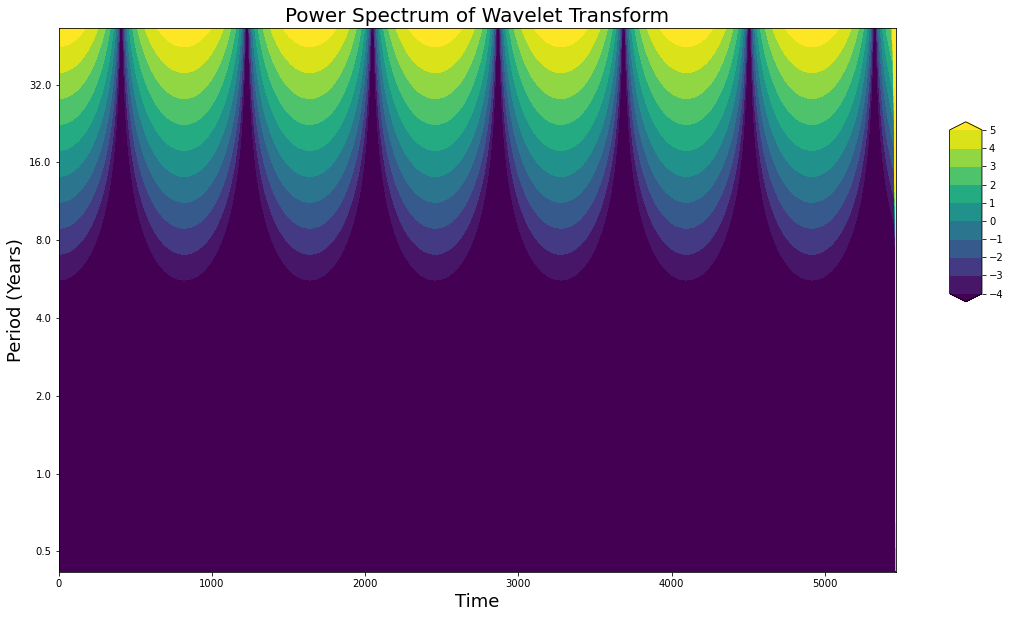

In [7]:
scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(data, scales, 'gaus1', dt)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both')
    
ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()

(array([48., 19., 17., 17., 15., 18., 17., 19., 25., 61.]),
 array([-9.99866138e+00, -7.99879524e+00, -5.99892910e+00, -3.99906297e+00,
        -1.99919683e+00,  6.69310452e-04,  2.00053545e+00,  4.00040159e+00,
         6.00026772e+00,  8.00013386e+00,  1.00000000e+01]),
 <BarContainer object of 10 artists>)

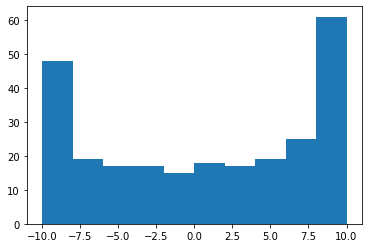

In [40]:
plt.hist(f_vals)